In [1]:
import pandas as pd
import seaborn as sns

### Problem 4.1

In [2]:
raw = pd.read_excel('lab4_data.xlsx')
raw.head()

,Name,Ticker,Exchange,E/P - Daily 2004-12-31,Daily Closing Price 2004-12-31 USD,Market Cap - Monthly 2004-12,BE/ME - Monthly 2004-12,One-Year Momentum 2004,Yearly Return Year 2005,FF Industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
2,"1st Century Bancshrs, Inc.",FCTY,NASDAQ,NaN,7.87500,83160000.0,NaN,0.471962,0.231746,45.0
3,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0
4,"1st Independence Financial Group, Inc.",FIFG,NASDAQ,-0.044257,18.98000,36315724.0,1.038282,-0.135089,-0.004630,45.0


In [3]:
tmp = raw.dropna()
tmp.columns = ["name", "ticker", "exchange","eP", "clsgPrice", "size","beMe", "m12M", "yr1Ret", "industry"]

In [4]:
tmp.head()

,name,ticker,exchange,eP,clsgPrice,size,beMe,m12M,yr1Ret,industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
3,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0
4,"1st Independence Financial Group, Inc.",FIFG,NASDAQ,-0.044257,18.98000,36315724.0,1.038282,-0.135089,-0.004630,45.0
7,1st Source Corporation,SRCE,NASDAQ,0.042340,23.19091,528712767.0,0.617725,0.205520,0.006680,45.0


### Problem 4.2

In [5]:
#removing outliers
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

#creating subset of our variables
out = tmp.loc[:,["beMe", "m12M", "size", "yr1Ret"]]
out.head()

#applying out is_out function
outA = out.apply(is_out)
outA.apply(sum, axis = 0)

#creating boolean index
outB = outA.any(axis = 1)
outB

#using boolean index
df = tmp[~outB]

print("Before and After Shapes")
print(tmp.shape)
print(df.shape)
df.reset_index(inplace = True, drop = True);  #just resets the index numbers
df.head(3)

Before and After Shapes
(4885, 10)
(4695, 10)


,name,ticker,exchange,eP,clsgPrice,size,beMe,m12M,yr1Ret,industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
2,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0


In [6]:
#removal of values that have negative book values and P/Es, prices lower than 5 and market caps under 100
df = df[(df['beMe'] > 0) & (df['eP'] > 0) & (df['clsgPrice'] > 5) & (df['size'] > 100000000)] 
df.reset_index(inplace = True)
df.shape # this is one value too low? 2931 in solutions; 2998 in code don't know about the discrepancy

(2930, 11)

### Problem 4.3

In [7]:
#creating lnSize
import numpy as np
df['lnSize'] = df["size"].apply(np.log)
df.head()

,index,name,ticker,exchange,eP,clsgPrice,size,beMe,m12M,yr1Ret,industry,lnSize
0,1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,5.549791e+08,0.343893,-0.293015,-0.235714,43.0,20.134441
1,4,1st Source Corporation,SRCE,NASDAQ,0.042340,23.19091,5.287128e+08,0.617725,0.205520,0.006680,45.0,20.085956
2,6,21st Century Insurance Group,TW,"NEW YORK STOCK EXCHANGE, INC.",0.072794,13.60000,1.162532e+09,0.666132,-0.067387,0.202298,34.0,20.873866
3,10,"51job, Inc. ADR",JOBS,NASDAQ,0.003487,51.97000,1.445199e+09,0.071201,0.715181,-0.717144,34.0,21.091513
4,11,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",0.037996,23.95000,2.704339e+09,0.171745,0.439024,0.564509,31.0,21.718123


In [8]:
factors = ["beMe", "m12M", "lnSize"]
factors_y = ["beMe", "m12M", "lnSize", "yr1Ret"]

### Problem 4.4 
**Two different ways for the scatter plot are showed below:**

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm #importing a module to perform a quick linear regression for slope and intercept


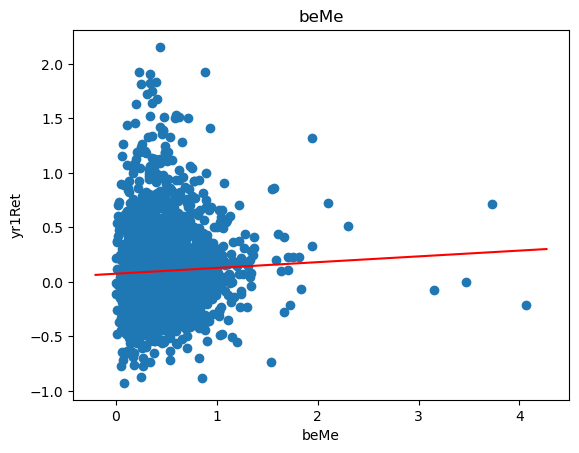

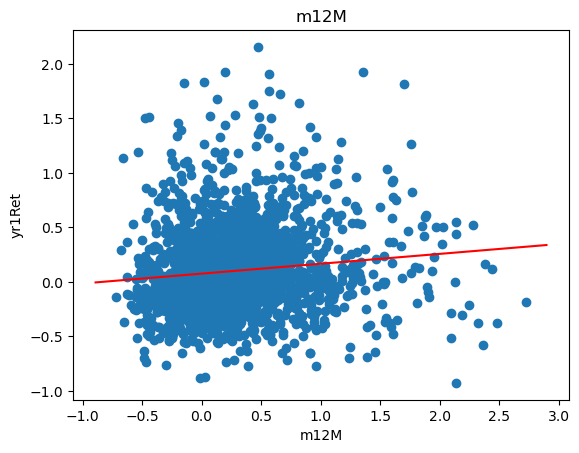

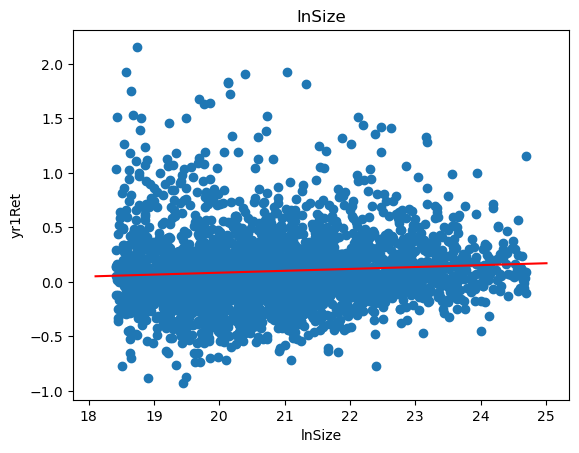

In [10]:
#quick function to plot regression line

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color = 'red')

factor_names = ("beMe", "m12M", "lnSize")

for i in factor_names:
    res = sm.OLS(df["yr1Ret"], sm.add_constant(df[i])).fit()
    a = res.params[1]
    b = res.params[0]
    
    plt.figure()
    plt.scatter(df[i], df["yr1Ret"])
    abline(a,b)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("yr1Ret")
    
    plt.show()

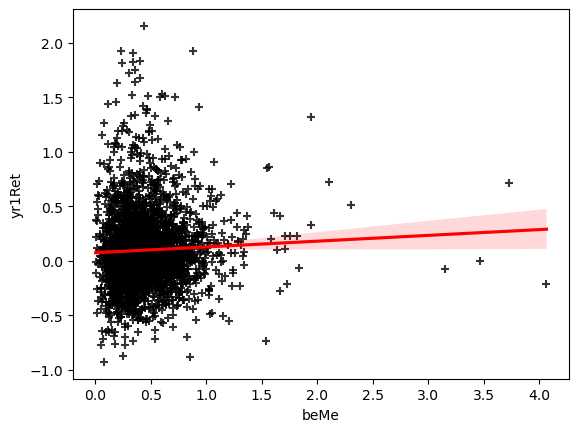

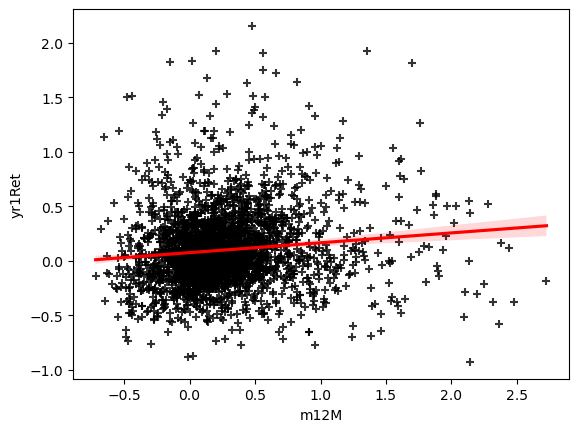

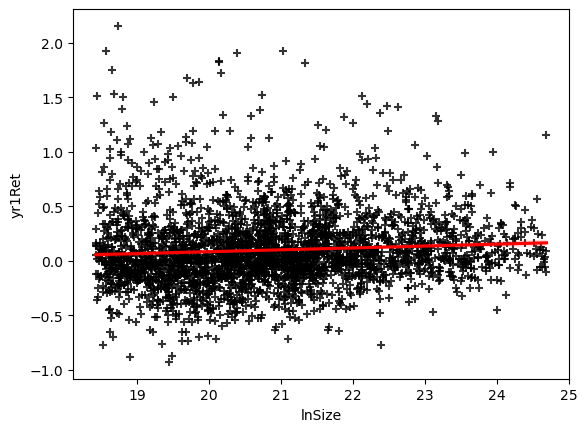

In [11]:
for factor in factor_names:
    ax = sns.regplot(x = factor, y = "yr1Ret", data = df, marker="+", ci = 95, 
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.show()

In [12]:
#correlation coefficients
corr = df[factors_y].corr()
corr

,beMe,m12M,lnSize,yr1Ret
beMe,1.000000,-0.159175,-0.138342,0.043337
m12M,-0.159175,1.000000,0.037661,0.109814
lnSize,-0.138342,0.037661,1.000000,0.074453
yr1Ret,0.043337,0.109814,0.074453,1.000000


In [13]:
#pvals
def pval(df):
    #matrix of tstats
    r = df.corr()
    n = df.shape[0]
    t = r * np.sqrt(n - 2) / np.sqrt(1-r*r)
    
    #matrix of p-values
    import scipy.stats as stats
    p = (1-stats.t.cdf(abs(t), n-2))*2 #cumulative distribution function
    p = stats.t.sf(abs(t), n -2)*2
    p = pd.DataFrame(p)
    p.columns = df.columns
    p.index = df.columns
    return p

""" ALTERNATIVE WAY:
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
    
pval = df.iloc[:, factors_y].corr(method=pearsonr_pval)
pval.round(3)
"""

' ALTERNATIVE WAY:\ndef pearsonr_pval(x,y):\n    return pearsonr(x,y)[1]\n    \npval = df.iloc[:, factors_y].corr(method=pearsonr_pval)\npval.round(3)\n'

In [14]:
corrcoef = pval(df[factors_y])
corrcoef.round(2)

C:\Users\pvile\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,beMe,m12M,lnSize,yr1Ret
beMe,0.00,0.00,0.00,0.02
m12M,0.00,0.00,0.04,0.00
lnSize,0.00,0.04,NaN,0.00
yr1Ret,0.02,0.00,0.00,0.00


In [15]:
corrcoef < 0.05

,beMe,m12M,lnSize,yr1Ret
beMe,True,True,True,True
m12M,True,True,True,True
lnSize,True,True,False,True
yr1Ret,True,True,True,True


### Problem 4.5

In [16]:
import scipy.stats as stats

In [17]:
df['ind_rm'] = df["industry"] #using the groupby function in this way coerces our group labels to NaN so we create a copy
factors.append('ind_rm') #adding it to factor list
df[factors] = df[factors].groupby('ind_rm').apply(lambda x: (x - x.mean()) / x.std()) #cannot use zscore func so we do it manually
factors.remove('ind_rm'); df.drop('ind_rm', inplace = True, axis =1 ) #removing our column designated for removal
df.head(3)

"""
ALTERNATIVELY: 
z_score = df.loc[:,['beMe', 'm12M', 'lnSize', 'industry']]

z_score = z_score.groupby('industry').apply(lambda x: (x - x.mean())/ x.std())  #or lambda x: stats.zscore(x)

z_score = z_score.drop('industry', axis = 1)

z_score.columns = ['z_beMe', 'z_m12M', 'z_lnSize']

df = pd.concat([df, z_score], axis=1)

If you want to use this code, you need to adjust the column names for the next steps to consider the z-score columns names
"""

"\nALTERNATIVELY: \nz_score = df.loc[:,['beMe', 'm12M', 'lnSize', 'industry']]\n\nz_score = z_score.groupby('industry').apply(lambda x: (x - x.mean())/ x.std())  #or lambda x: stats.zscore(x)\n\nz_score = z_score.drop('industry', axis = 1)\n\nz_score.columns = ['z_beMe', 'z_m12M', 'z_lnSize']\n\ndf = pd.concat([df, z_score], axis=1)\n\nIf you want to use this code, you need to adjust the column names for the next steps to consider the z-score columns names\n"

In [18]:
df[factors].mean()

beMe      9.029561e-17
m12M      1.262547e-16
lnSize    8.095534e-16
dtype: float64

In [19]:
import statsmodels.api as sm
#print(sm.OLS(y_train, sm.add_constant(X_train)).fit().summary())
res = sm.OLS(endog = df["yr1Ret"], exog = sm.add_constant(df[factors])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 yr1Ret   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.540
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           5.04e-05
Time:                        10:39:03   Log-Likelihood:                -984.44
No. Observations:                2930   AIC:                             1977.
Df Residuals:                    2926   BIC:                             2001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0992      0.006     15.847      0.0

### Problem 4.6

### A

This was a conceptual problem. Just printing the Adjusted R^2.

In [20]:
print("Adjusted R-Squared:",res.rsquared_adj.round(4))

Adjusted R-Squared: 0.0067


Sol: We can answer this question by examining the measure of goodness of fit for the regression model. This is the multiple coefficient of determination (or adjusted R2) rather than the coefficient of determination (or R2), which tends to increase by adding variables to a model even if those variables do not really explain the dependent variable or have any relationship at all. The adjusted R2 for this data sample is 0.0062, which is a reasonable level for regressions on large sample data.

### B

F-test

In [21]:
uF = res.fvalue

In [22]:
import scipy.stats as stats
k = 3
n = df.shape[0]
uF_Crit = stats.f.ppf(0.95, k, n - (k+1))

In [23]:
uF > uF_Crit

True

For a model with multiple explanatory variables on it, the standard benchmark for a large F-statistic is 2. To determine whether the computed F -statistic is large or not, we find the critical value of this statistic. The critical value for a F (3, 2926) calculated using the F inverse cumulative distribution function qf for a 5% significance level, is 2.61.

Since the computed F -statistic (7.54) from the regression is larger than the critical F-value (2.61), we conclude that there is a statistically significant (or valid) fit in this multiple regression model. Note also that the regression output provides a p-value for the F -statistic, which in this case is 0.0099%. This means that there is only 0.0099% likelihood that we would have observed an F-statistic of this size, if there were really no relationship.

## Problem 4.7

### A

Unrestricted Residual Sum of Squares

In [24]:
ussr = sum(res.resid**2) 
ussr

335.9143996699761

### B

Restricted Model

In [25]:
restricted_model = sm.OLS(endog = df["yr1Ret"], exog = sm.add_constant(df['m12M'])).fit()
print(restricted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 yr1Ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.605
Date:                Fri, 24 Feb 2023   Prob (F-statistic):            0.00586
Time:                        10:39:04   Log-Likelihood:                -991.93
No. Observations:                2930   AIC:                             1988.
Df Residuals:                    2928   BIC:                             2000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0992      0.006     15.812      0.0

### C

Restricted Sum of Squares

In [26]:
rssr = sum(restricted_model.resid**2)
rssr

337.634349414233

### D

In [27]:
q = 2
rF = ((rssr-ussr)/q) / (ussr/(n-(k+1))) # or ((rssr-ussr)/ussr) * ((n-(k+1))/q)
rF

7.4908562369460725

Sol: To compute the F-statistic for the subset of linear restrictions, create the variable with the number of linear restrictions and then calculate the F-statistic using the formula above. Note that the denominator of the F -statistic is a consistent estimate of the unrestricted regression variance. Dividing by the latter makes the F -statistic invariant to units of measurement.

### E

In [28]:
rF_Crit = stats.f.ppf(0.95, q, n - (k+1))
print(rF > rF_Crit)

stats.f.sf(rF, q, n - (k+1))

True


0.0005689351526795684

### F

Given the results we will reject the null hypothesis that this subset of coefficients is not statistically significant in favor of the alternative that the regressors are statistically relevant for 2 reasons. The first reason is that when we restrict the full model, we are assuming that the null hypothesis is true and thus we remove the regressors from the model. Thus, the difference between the restricted sum of squared residuals and the unrestricted sum of squared residuals (i.e., RSSR − USSR) tells us how much larger the residuals are in the restricted model. We know that with larger residuals the fit of a regression is worse, which in turn makes the restricted F-statistic larger, and we will therefore question the null hypothesis. However if the regressors had no predictive power, removing them from the full regression should not affect the residuals. In this case we can see that the difference between the residuals is large (i.e., RSSR − USSR = 1.72), which means that the fit of the restricted regression model is worse than that of the original model. The second reason is that the restricted F -statistic (7.49) is larger than the critical value for the restricted F -statistic (3), which means that we can reject the null hypothesis that the subset of coefficients is not significant. Moreover the p-value of this restricted F-statistic (i.e., p = 0.05568%) is much lower than the specified significance level of 5%, which allows us to reject the null hypothesis with a higher confidence level than 95%.

## Problem 4.8

In [29]:
print(stats.t.ppf(q = [0.025,0.975], df = n - 1))
print(res.tvalues)

[-1.96077424  1.96077424]
const     15.847465
beMe       3.261445
m12M       3.413204
lnSize     2.724761
dtype: float64


Since the computed t-statistics for the individual coefficients in the regression output (i.e., 2.72 for zLnSize, 3.26 for zBeMe, and 3.41 for zM12M) are larger than the critical t-value (1.96), we can reject the null hypothesis and conclude that there is a statistically significant (or valid) relationship for the individual coefficients of this model. Furthermore since the p-values of the t-statistics are lower than the specified significance level of 5%, we can reject the null hypothesis that the true slope parameters are zero at significance levels smaller than 5% or at a higher confidence levels than 95%.

## Problem 4.9

In [30]:
res.params

const     0.099198
beMe      0.021662
m12M      0.022172
lnSize    0.017599
dtype: float64

The estimated factor premia for size, BE/ME ratio, and 1-year price momentum are the least square slope coefficients from the regression, which in this case are 1.7%, 2.1% and 2.2%, respectively. This means for example that 1 standard deviation increase in 1-year price momentum, for example, forecasts a 2.2% greater return in average stock returns for the next period. These results also coincide with our results in the correlation analysis that given a positive correlation coefficient between the explanatory variables and the explained variable, we can expect a positive slope coefficient.
However although all of the individual coefficients in this regression model are statistically significant, not all of them are economically meaningful. For instance, if the size factor is positively related to future returns it means that it has a positive premium in the cross-section of future returns. This result is inconsistent with the economic notion that size and future average returns are negatively related, i.e., that small firms have, on average, higher average future returns than that of large firms. Therefore in this sense, for the firms studied under this sample we cannot conclude that this factor is economically meaningful.
The economic meaning of the estimate of BE/ME is that future returns on these stocks tend to be positively related to the firm’s BE/ME ratios. The prior return or 1-year price momentum is strongly positively related to future returns, which is consistent with the economic notion that past winners’ returns tend to be high in the first subsequent year. Therefore for the sample studied both factors, BE/ME and 1-year price momentum, have a positive premium in the cross-section of future stock returns.

## Problem 4.10

Testing for heteroskedasticity.

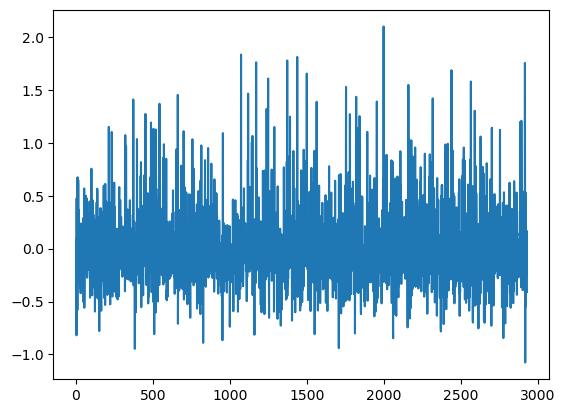

In [31]:
plt.plot(res.resid)

In [32]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.het_breuschpagan(res.resid, res.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 48.591056621956064),
 ('p-value', 1.593973993114217e-10),
 ('f-value', 16.447674785697075),
 ('f p-value', 1.3434314331959636e-10)]

## Problem 4.11

In [33]:
from statsmodels.stats.stattools import durbin_watson

In [36]:
durbin_watson(res.resid).round(3)

2.002

A Durbin-Watson test of 2.002 means that the regression doesn't have serial correlation (a DW value of 4 would mean a negative serial correlation and a DW of 0 would mean a positive serial correlation)

If there is serial correlation, we can exclude one or more independent variables, and include lags for the dependent and/or independent variables.